In [14]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA


<Axes: xlabel='Order Date'>

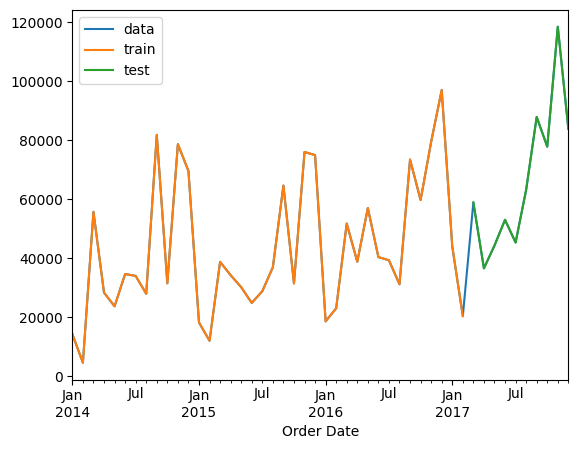

In [18]:
df = pd.read_excel("Superstore_Sales_Records.xls",index_col="Order Date", parse_dates=True)[["Sales"]].resample("MS").sum()

train_size = int(0.8 * len(df)) 
df_train = df[:train_size].dropna()
df_test = df[train_size:].dropna()

a = pd.DataFrame()
a["data"] = df.copy()
a["train"] = df_train.copy()
a["test"] = df_test.copy()
a.plot()

/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: xlabel='Order Date'>

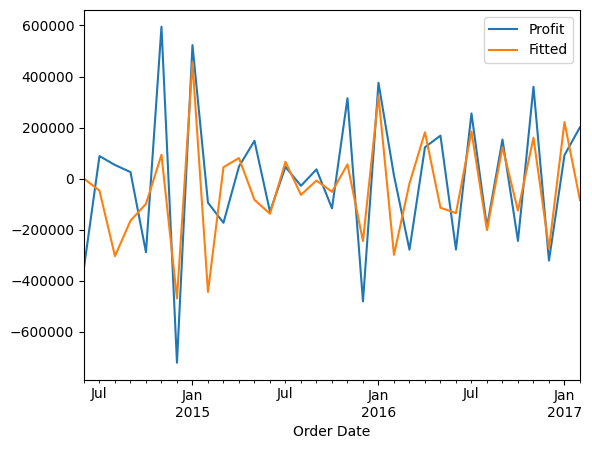

In [23]:
df_train = df_train.diff().dropna()
model = ARIMA(df_train, order=(1, 1, 1))  # Example with AR(1), I(1), MA(1)
model_fit = model.fit()

b = pd.DataFrame()
b["Profit"] = df_train.copy()
b["Fitted"] = model_fit.fittedvalues

b.plot()


